In [15]:
import pandas as pd
import numpy as np

In [4]:
coffee_shops = pd.read_csv('coffee.csv')

In [6]:
coffee_shops

,Region,Place name,Place type,Rating,Reviews,Price,Delivery option,Dine in option,Takeout option
0,C,Dim Kavu,Others,4.6,206.0,$$,False,NaN,NaN
1,C,Коферум,Cafe,5.0,24.0,$$,False,NaN,True
2,C,Кофейня Світ Чаю,Coffee shop,5.0,11.0,$$,False,NaN,True
3,C,Кофейня Starcoff,Coffee shop,4.4,331.0,$$,False,True,True
4,C,"Кофейня ""Friend Zone""",Coffee shop,5.0,12.0,$$,False,True,True
...,...,...,...,...,...,...,...,...,...
195,H,Artist,Others,4.6,963.0,$$$,False,True,True
196,H,Dream Cafe,Cafe,4.3,646.0,$$,False,True,True
197,H,РУТА КАФЕ ПП КУЛІЧЕНКО К.І.,Cafe,4.6,16.0,$$,False,True,True
198,H,Ob'yektna Kava,Coffee shop,4.7,599.0,$$,False,True,True


In [5]:
print(coffee_shops.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Region           200 non-null    object 
 1   Place name       200 non-null    object 
 2   Place type       200 non-null    object 
 3   Rating           198 non-null    float64
 4   Reviews          198 non-null    float64
 5   Price            200 non-null    object 
 6   Delivery option  200 non-null    bool   
 7   Dine in option   140 non-null    object 
 8   Takeout option   144 non-null    object 
dtypes: bool(1), float64(2), object(6)
memory usage: 12.8+ KB
None


In [7]:
# Check Region column, count missing values, fill missing values with 'Unknown' value
np.sort(coffee_shops.Region.unique())
coffee_shops.Region.isna().sum()
coffee_shops['Region'] = coffee_shops['Region'].fillna('Unknown')

# Check Place name column, count missing values, fill missing values with 'Unknown' value
np.sort(coffee_shops['Place name'].unique())
coffee_shops['Place name'].isna().sum()
coffee_shops['Place name'] = coffee_shops['Place name'].fillna('Unknown')

# Check Place type column, count missing values, fill missing values with 'Unknown' value
np.sort(coffee_shops['Place type'].unique())
coffee_shops['Place type'].isna().sum()
coffee_shops['Place type'] = coffee_shops['Place type'].fillna('Unknown')

# Check Rating column, count missing values, fill missing values with 0 value
np.sort(coffee_shops['Rating'].unique())
coffee_shops['Rating'].isna().sum()
coffee_shops['Rating'] = coffee_shops['Rating'].fillna(0)

# Check Reviews column, count missing values, fill missing values with median value, rounded to the nearest int.value
np.sort(coffee_shops['Reviews'].unique())
coffee_shops['Reviews'].isna().sum()
coffee_shops['Reviews'] = coffee_shops['Reviews'].fillna(coffee_shops['Reviews'].median()).astype("int")

# Check Price column, count missing values, fill missing values with 0 value
np.sort(coffee_shops['Price'].unique())
coffee_shops['Price'].isna().sum()
coffee_shops['Price'] = coffee_shops['Price'].fillna('Unknown')

# Check Delivery option column, count missing values, fill missing values with False
np.sort(coffee_shops['Delivery option'].unique())
coffee_shops['Delivery option'].isna().sum()
coffee_shops['Delivery option'] = coffee_shops['Delivery option'].fillna(False)

# Check Dine in option column, count missing values, fill missing values with False
np.sort(coffee_shops['Dine in option'].unique())
coffee_shops['Dine in option'].isna().sum()
coffee_shops['Dine in option'] = coffee_shops['Dine in option'].fillna(False)

# Check Takeout option column, count missing values, fill missing values with False
np.sort(coffee_shops['Takeout option'].unique())
coffee_shops['Takeout option'].isna().sum()
coffee_shops['Takeout option'] = coffee_shops['Takeout option'].fillna(False)

cleaned_coffee_shops = coffee_shops.copy()

In [11]:
print(len(np.sort(coffee_shops['Rating'].unique())))
np.sort(coffee_shops['Rating'].unique())
print(coffee_shops['Rating'].isna().sum())

,Rating,Median,Minimum,Maximum
0,Cafe,299.0,9,2236
1,Coffee shop,292.0,3,17937
2,Espresso bar,204.0,11,1908
3,Others,167.0,10,2381


,Place type,sum
0,Cafe,30646
1,Coffee shop,71076
2,Espresso bar,10519
3,Others,11555


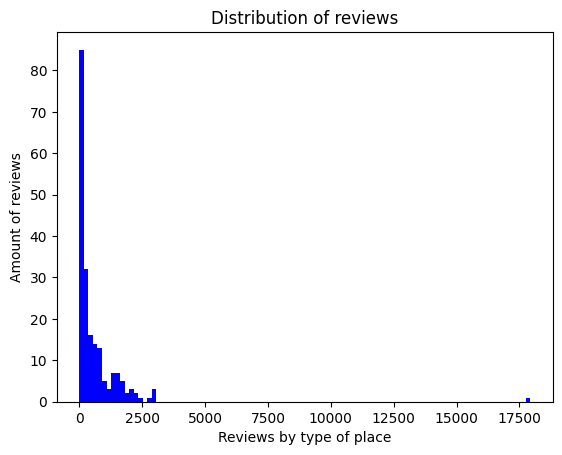

In [26]:
clean_data.rename(columns={
    clean_data.columns[-3]: "Delivery Option",
    clean_data.columns[-2]: "Dine in Option",
    clean_data.columns[-1]: "Takeout Option"
}, inplace=True)

(clean_data.
 dtypes)

In [ ]:
df = pd.read_csv("coffee.csv")

reviews_by_rating = df.groupby("Rating")["Reviews"].agg(["median", "min", "max"]).reset_index(drop=False)
reviews_by_rating.columns = ["rating", "med_review", "min_review", "max_review"]
#reviews_by_rating = reviews_by_rating.set_index("rating")
reviews_by_rating = reviews_by_rating.round(1)
reviews_by_rating